# Reward Training Analysis

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from rt_extension import Reward_Training
from pathlib import Path

In [2]:
# NAc
# nac_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc"
nac_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc"
nac_color = '#15616F'

# mPFC
# mpfc_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC"
mpfc_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"
mpfc_color = '#FFAF00'

# NAc: #15616F
# mPFC: #FFAF00
save_path = r'graphs'
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\test"


In [3]:
nac_exp = Reward_Training(experiment_folder_path=nac_experiment_path, behavior_folder_path=None)
mpfc_exp = Reward_Training(experiment_folder_path=mpfc_experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n5-240911-062153\Notes.txt
read from t=0s to t=1769.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n7-240911-111928\Notes.txt
read from t=0s to t=1688.06s
read from t=0s to t=3853.09s
read from t=0s to t=3853.09s
read from t=0s to t=3851.18s
read from t=0s to t=3851.18s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC\p1-240607-065311\Notes.txt
read from t=0s to t=1684.75s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC\p2-240607-092425\Notes.txt
read from t=0s to t=1761.77s
Fo

Reward Training Processing - Create DA df and obtain DA metrics

In [4]:
def run_rtc_pipeline(exp, experiment_path):
    exp.rtc_processing()
    exp.create_base_df(experiment_path)
    exp.remove_specified_subjects()
    exp.extract_da_columns()
    exp.find_first_port_entry_after_sound_cue()
    # exp.compute_closest_port_offset(
    #     PE_column='first_PE_after_sound_cue',
    #     offset_column='filtered_port_entry_offset'
    # )

    # Choose either standard or EI DA
    # exp.compute_standard_DA()  # for all tones, calculate the standard DA response (-4s ->10s) for both tone and lick
    exp.compute_EI_DA()  # for all tones, calculate the event-induced DA response (-4s ->10s) for both tone and lick

    exp.compute_rtc_da_metrics()

run_rtc_pipeline(nac_exp, experiment_path=nac_experiment_path)
run_rtc_pipeline(mpfc_exp, experiment_path=mpfc_experiment_path)

Processing trial n5-240911-062153...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 1.9436·ISOS + -25.1213
Processing trial n7-240911-111928...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 1.8945·ISOS + -29.2776
Processing trial nn1-250202-133348...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 5.0161·ISOS + 104.1715
Processing trial nn2-250202-133348...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 0.8283·ISOS + 145.1506
Processing trial nn3-250202-122021...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 4.2525·ISOS + 140.3675
Processing trial nn4-250202-122021...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 4.2230·ISOS + 59.8651
Processing trial nn5-250202-082015...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 6.0864·ISOS + 14.2462
Processing trial nn6-250202-082015...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 3.3629·ISOS + 180.5905
Processing trial nn7-250202-070333...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA ≃ 3.2509·ISOS + 305.7629
Processing trial nn8-250202-070333...
Low-pass filtered @ 3.0 Hz
IRLS fit: DA

# Group PSTH's

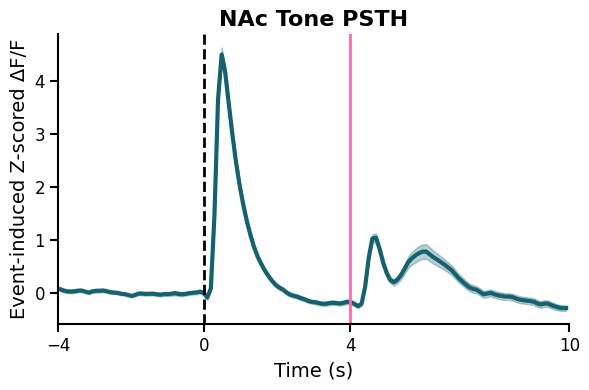

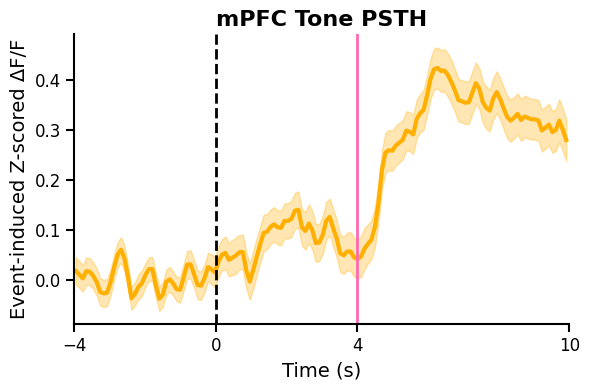

In [5]:
nac_exp.plot_group_PETH(event_type='Tone',brain_region='NAc', xlim=(-4,10))
mpfc_exp.plot_group_PETH(event_type='Tone',brain_region='mPFC', xlim=(-4,10))

## PSTH For first and last tones

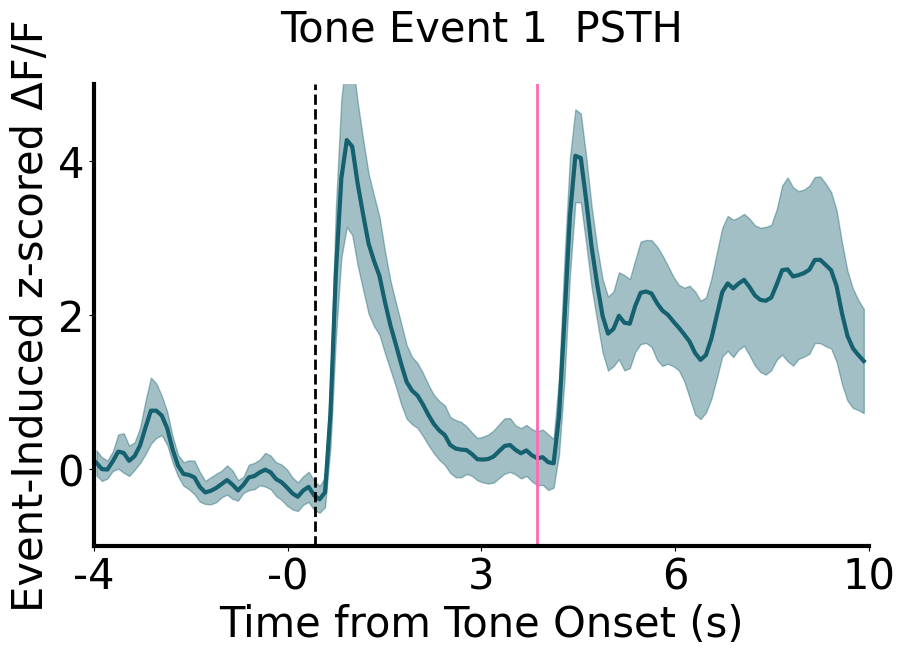

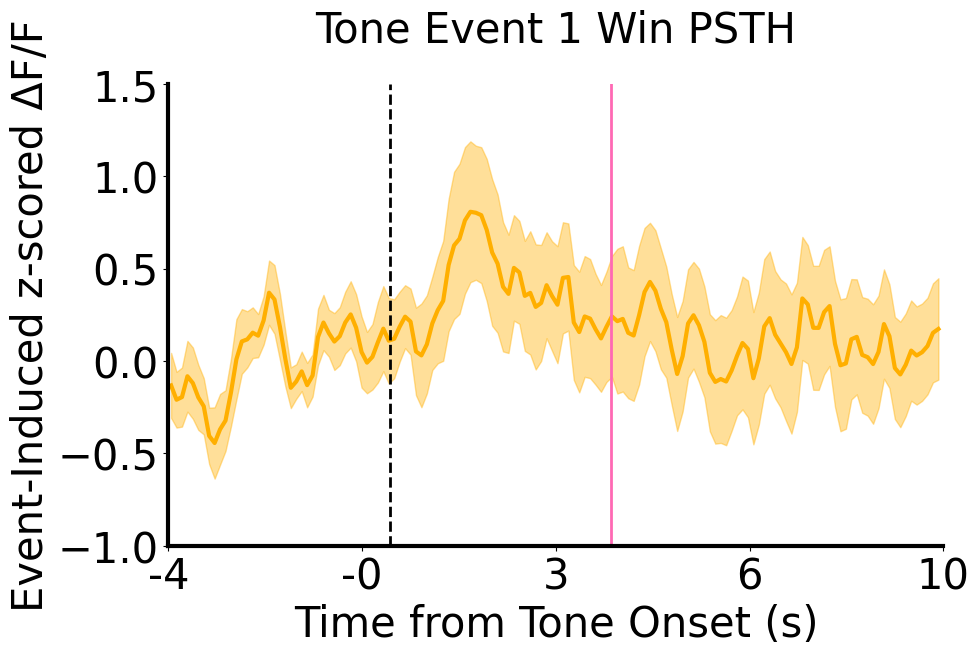

In [6]:
nac_exp.plot_specific_event_psth(event_type='Tone', 
                             event_index = 1, directory_path=None, 
                             brain_region='NAc', 
                             condition= '', y_min=-1, y_max=5, xlim=(-4,10))
mpfc_exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=1.5,  
                                  xlim=(-4,10))

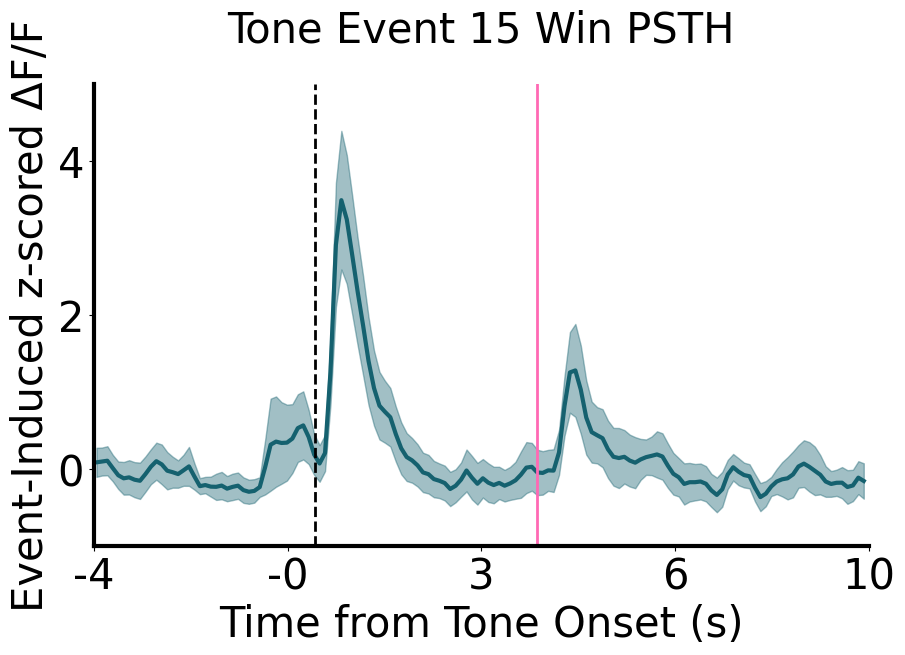

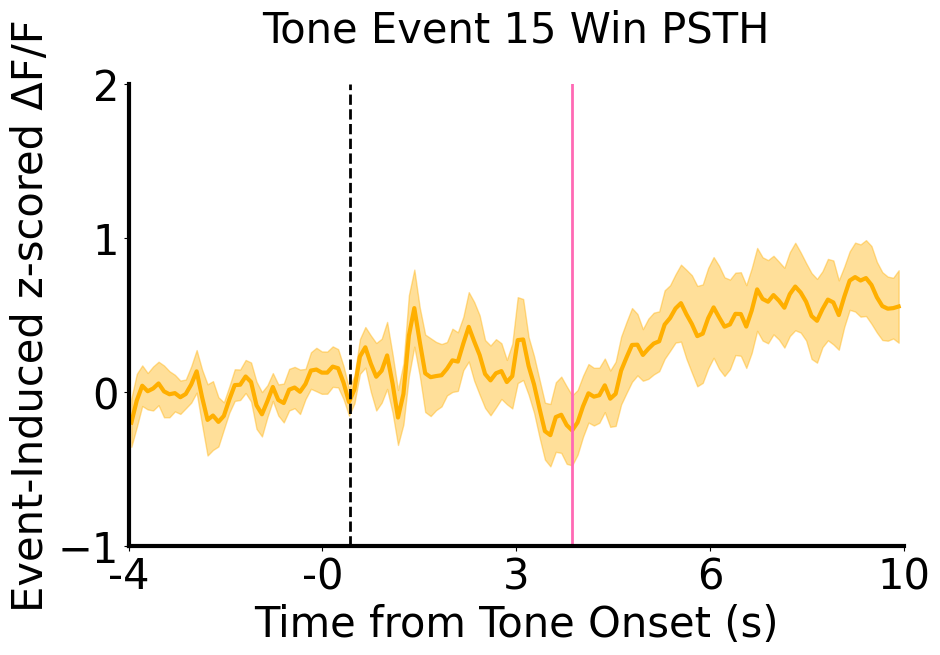

In [7]:
nac_exp.plot_specific_event_psth(event_type='Tone', event_index = 15, directory_path=None, brain_region='NAc', 
                                 y_min=-1, y_max=5, xlim=(-4,10))
mpfc_exp.plot_specific_event_psth(event_type='Tone', event_index = 15, directory_path=None, brain_region='mPFC', 
                                  y_min=-1, y_max=2, xlim=(-4,10))

Individual plots

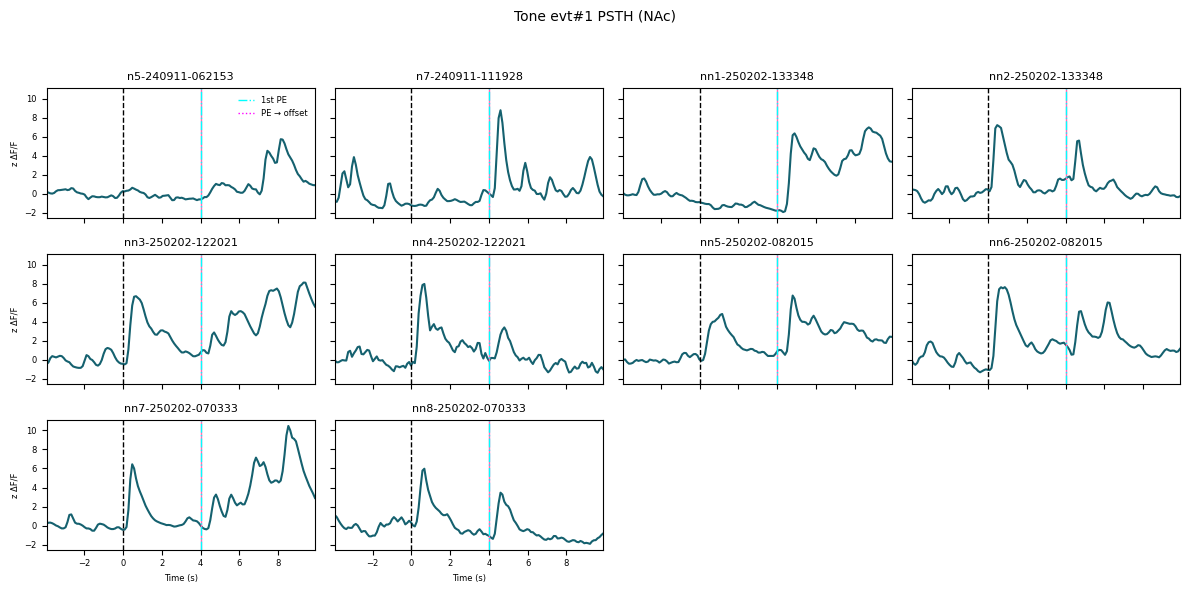

In [8]:
df = nac_exp.plot_PETH_index_grid(df=nac_exp.da_df,brain_region='NAc',event_type='Tone',event_index=1)

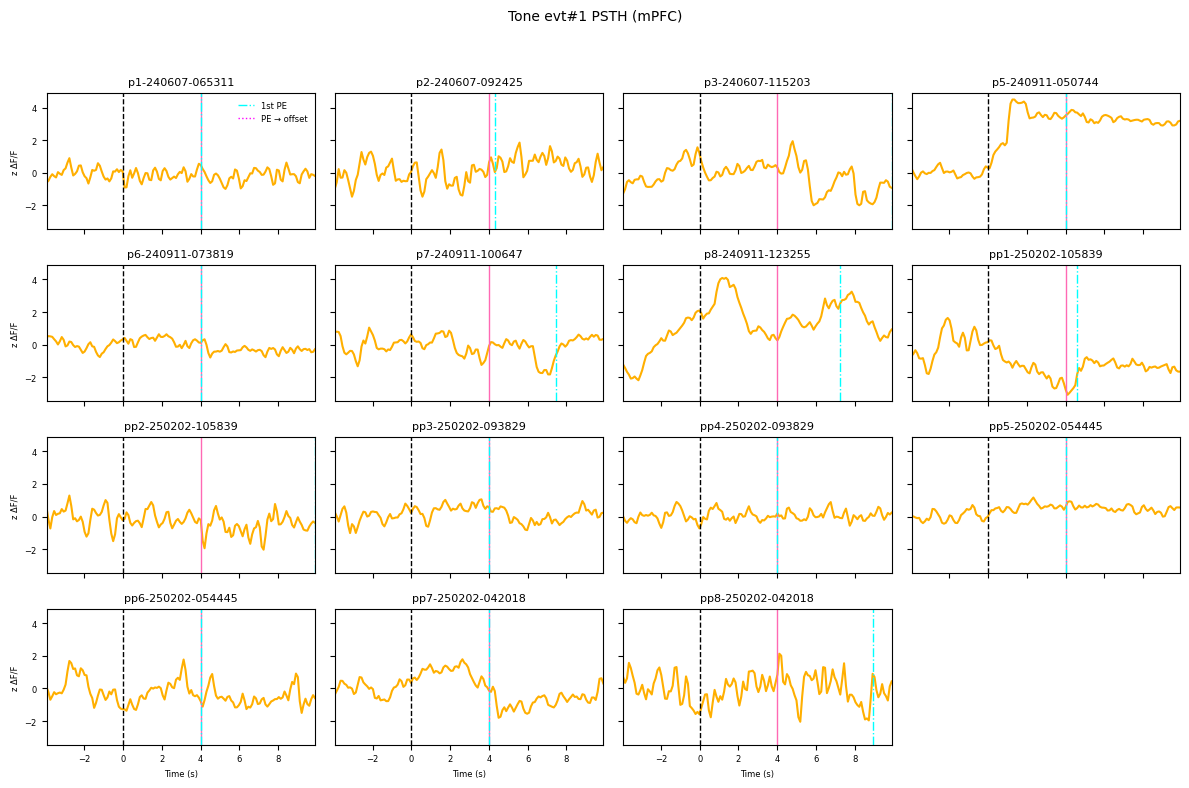

In [9]:
df = mpfc_exp.plot_PETH_index_grid(df=mpfc_exp.da_df,brain_region='mPFC',event_type='Tone',event_index=1)

## Heat maps

In [10]:
nac_exp.plot_event_index_heatmap(event_type = 'Tone', 
                             max_events = 1, 
                             directory_path = None, 
                             brain_region = 'NAc', 
                             vmin = -0.2, 
                             vmax = 6, df=None, bin_size=100)

# exp.plot_event_index_heatmap(event_type = 'Tone', 
#                              max_events = 15, 
#                              directory_path = save_path,
#                              brain_region = 'mPFC', 
#                              vmin = -0.3, 
#                              vmax = 2, df=None, bin_size=100)

No Tone event time axes found.


## Finding DA metrics

Code to look at a single trial DA response

In [11]:
# # Select a trial (e.g., the first trial)
# trial = df.iloc[0]

# # Extract the first tone and lick responses (if multiple events exist)
# tone_time = trial['Tone Event_Time_Axis'][0]  # should be -pre_time to post_time
# tone_zscore = trial['Tone Event_Zscore'][0]
# lick_time = trial['Lick Event_Time_Axis'][0]  # should be 0 to post_time
# lick_zscore = trial['Lick Event_Zscore'][0]

# # Plotting both traces
# plt.figure(figsize=(8, 4))
# plt.plot(tone_time, tone_zscore, label='Tone Event (Sound Cue)')
# plt.plot(lick_time, lick_zscore, label='Lick Event')
# plt.axhline(0, color='gray', linestyle='--')
# plt.axvline(0, color='gray', linestyle='--')
# plt.xlabel('Time (s)')
# plt.ylabel('Baseline-corrected z-score')
# plt.title('Tone and Lick DA Responses')
# plt.legend()
# plt.show()
